## Loading Data

In [1]:
import pandas as pd

df = pd.read_csv("land_price_1.csv")

df.head()

,land_area,dist_to_city,price
0,122,12.9,15.7
1,173,18.4,11.3
2,341,11.0,42.0
3,439,19.3,35.0
4,477,19.7,37.7


## Check Correlation 

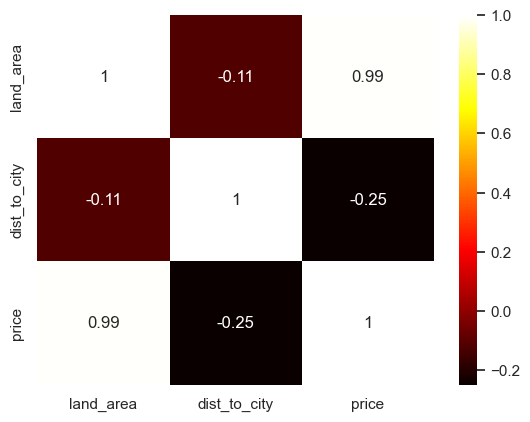

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='hot')
plt.show()

## Separate X and y

In [3]:
X = df[['land_area', 'dist_to_city']].values
y = df['price']
m = len(y)

## Scale X

In [4]:
import numpy as np
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_norm = (X - mu) / sigma

## Concate X

In [5]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

## Define Function

In [6]:
# Define Function
def hyp(X, theta):
    return X.dot(theta)

def cost(y_hat, y):
    y_hat = hyp(X, theta)
    return np.sum((y_hat- y)**2) / (2 * m)

def grad(y_hat, y):
    return X.T.dot(y_hat - y) / m

## Training

In [7]:
# Training
lr = 0.01 
epochs = 1000
theta = np.zeros(3)
cost_lst = []

for epoch in range(1, epochs+1):
    y_hat = hyp(X, theta)
    grad_ = grad(y_hat, y)
    theta -= lr * grad_
    cost_ = cost(y_hat, y)
    cost_lst.append(cost_)
    print(f"Epoch: {epoch:03d}, Cost: {cost_:.4f}")

Epoch: 001, Cost: 17174.3166
Epoch: 002, Cost: 16829.2678
Epoch: 003, Cost: 16491.1704
Epoch: 004, Cost: 16159.8842
Epoch: 005, Cost: 15835.2714
Epoch: 006, Cost: 15517.1974
Epoch: 007, Cost: 15205.5299
Epoch: 008, Cost: 14900.1397
Epoch: 009, Cost: 14600.8999
Epoch: 010, Cost: 14307.6864
Epoch: 011, Cost: 14020.3773
Epoch: 012, Cost: 13738.8536
Epoch: 013, Cost: 13462.9984
Epoch: 014, Cost: 13192.6972
Epoch: 015, Cost: 12927.8380
Epoch: 016, Cost: 12668.3107
Epoch: 017, Cost: 12414.0079
Epoch: 018, Cost: 12164.8240
Epoch: 019, Cost: 11920.6558
Epoch: 020, Cost: 11681.4019
Epoch: 021, Cost: 11446.9632
Epoch: 022, Cost: 11217.2426
Epoch: 023, Cost: 10992.1447
Epoch: 024, Cost: 10771.5764
Epoch: 025, Cost: 10555.4463
Epoch: 026, Cost: 10343.6647
Epoch: 027, Cost: 10136.1439
Epoch: 028, Cost: 9932.7981
Epoch: 029, Cost: 9733.5429
Epoch: 030, Cost: 9538.2958
Epoch: 031, Cost: 9346.9761
Epoch: 032, Cost: 9159.5044
Epoch: 033, Cost: 8975.8033
Epoch: 034, Cost: 8795.7965
Epoch: 035, Cost: 861

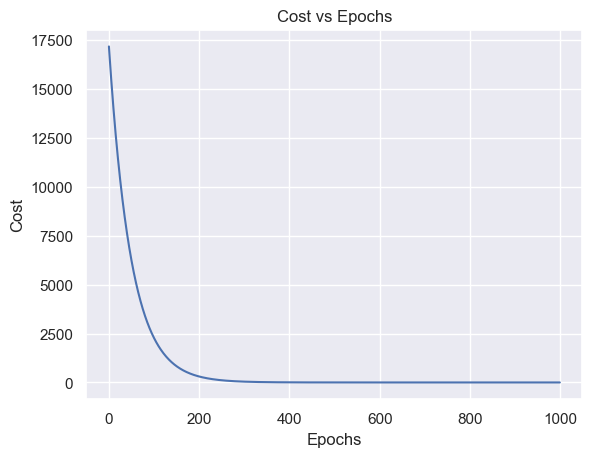

In [8]:
plt.plot(cost_lst)
plt.title("Cost vs Epochs")
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.show()

In [9]:
print(theta)

[164.74622073  86.7020899  -12.22016147]
